In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [2]:
Image=image.load_img(r"D:\Naresh IT\Class Notes\Completed\Deep Learning (DL)\Happy-Sad Face Images\Happy-Training\Happy\Happy2.webp")

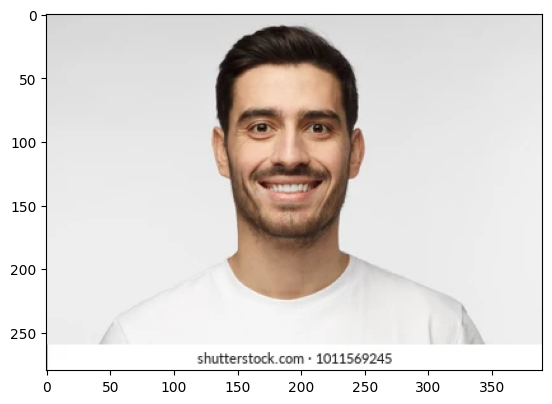

In [4]:
plt.imshow(Image)

In [13]:
Image1=cv2.imread(r"D:\Naresh IT\Class Notes\Completed\Deep Learning (DL)\Happy-Sad Face Images\Happy-Training\Happy\Happy2.webp")
Image1

array([[[212, 212, 212],
        [212, 212, 212],
        [212, 212, 212],
        ...,
        [224, 224, 224],
        [224, 224, 224],
        [224, 224, 224]],

       [[212, 212, 212],
        [212, 212, 212],
        [212, 212, 212],
        ...,
        [224, 224, 224],
        [224, 224, 224],
        [224, 224, 224]],

       [[212, 212, 212],
        [212, 212, 212],
        [212, 212, 212],
        ...,
        [224, 224, 224],
        [224, 224, 224],
        [224, 224, 224]],

       ...,

       [[  1,   1,   1],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  1,   1,   1],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  1,   1,   1],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [14]:
Image1.shape

(280, 390, 3)

In [15]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [21]:
train_dataset = train.flow_from_directory(r'D:\Naresh IT\Class Notes\Completed\Deep Learning (DL)\Happy-Sad Face Images\Happy-Training',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validation_dataset = validation.flow_from_directory(r'D:\Naresh IT\Class Notes\Completed\Deep Learning (DL)\Happy-Sad Face Images\Sad-Validation',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 2 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [22]:
train_dataset.class_indices

{'Happy': 0, 'No happy': 1}

In [23]:
train_dataset.class_indices

{'Happy': 0, 'No happy': 1}

In [24]:
train_dataset.classes

array([0, 0])

In [25]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
                                 tf.keras.layers.MaxPool2D(2,2), 
                                 tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(512, activation='relu'),
                                 tf.keras.layers.Dense(1, activation='sigmoid')])

In [26]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             metrics=['accuracy'])

In [35]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 10,
                     validation_data = validation_dataset)

Epoch 1/10
1/3 [=========>....................] - ETA: 0s - loss: 1.2675e-23 - accuracy: 1.0000WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 30 batches). You may need to use the repeat() function when building your dataset.


3/3 [==============================] - 1s 135ms/step - loss: 1.2675e-23 - accuracy: 1.0000 - val_loss: 55.0920 - val_accuracy: 0.0000e+00


In [42]:
dir_path=r'D:\Naresh IT\Class Notes\Completed\Deep Learning (DL)\Happy-Sad Face Images\Happy-Training\Happy'
for i in os.listdir(dir_path):
    print(i)

Happy.jpg
Happy1.jpg
Happy2.webp


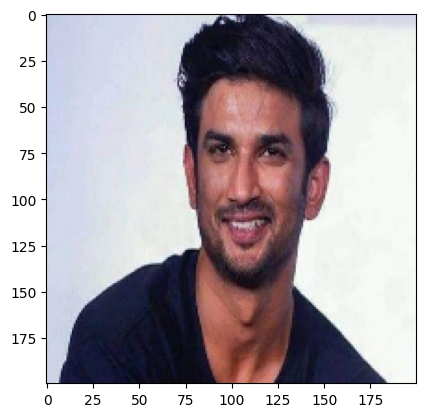

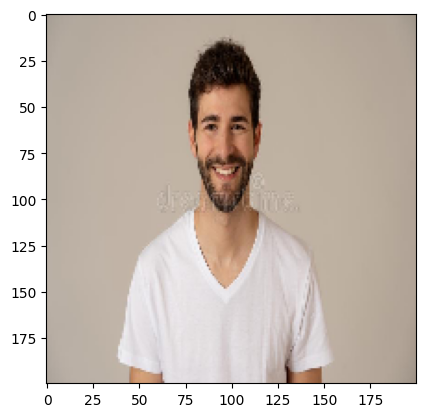

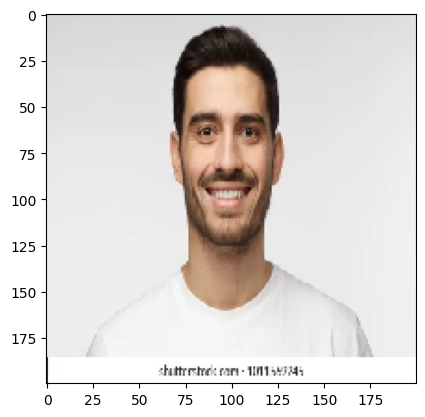

In [44]:
dir_path=r'D:\Naresh IT\Class Notes\Completed\Deep Learning (DL)\Happy-Sad Face Images\Happy-Training\Happy'
for i in os.listdir(dir_path):
    Image3=image.load_img(dir_path+'//'+i, target_size=(200,200))
    plt.imshow(Image3)
    plt.show()

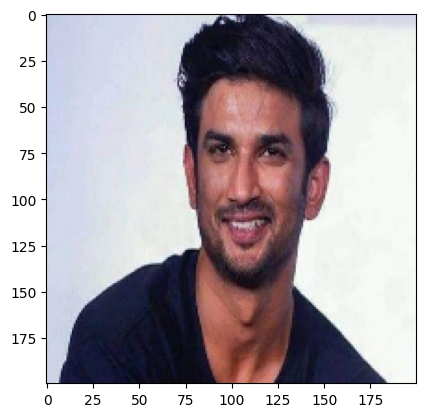

AttributeError: img_to_array

In [46]:
dir_path=r'D:\Naresh IT\Class Notes\Completed\Deep Learning (DL)\Happy-Sad Face Images\Happy-Training\Happy'
for i in os.listdir(dir_path):
    Image4=image.load_img(dir_path+'//'+i, target_size=(200, 200))
    plt.imshow(Image4)
    plt.show()
    x=Image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    Images=np.vstack([x])
    
    val=model.predict(Images)
    if val == 0:
        print('i am not happy')
    else:
        print('i am happy')

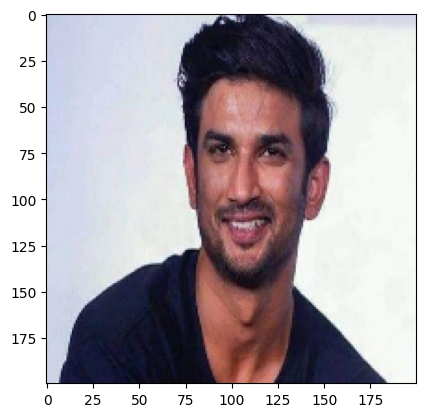

1/1 [==============================] - 0s 52ms/step
 I am happy


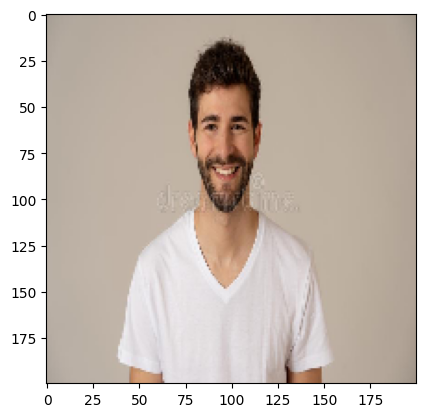

1/1 [==============================] - 0s 63ms/step
 I am happy


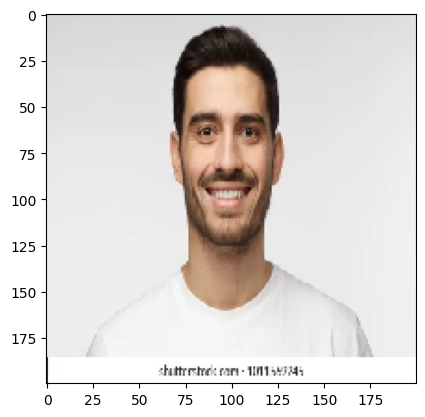

1/1 [==============================] - 0s 63ms/step
 I am happy


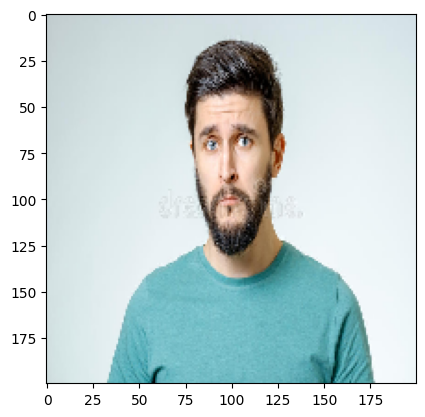

1/1 [==============================] - 0s 63ms/step
 I am happy


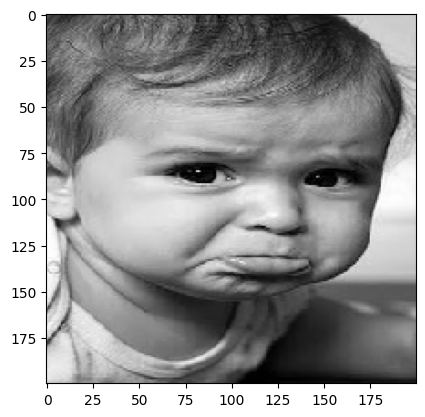

1/1 [==============================] - 0s 43ms/step
 I am happy


In [49]:
dir_path = r'D:\Naresh IT\Class Notes\Completed\Deep Learning (DL)\Happy-Sad Face Images\Happy-Training\Happy'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()
        
    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    
    val = model.predict(images)
    if val == 0:
        print( ' I am happy')
    else:
        print('I am not happy')